# Módulo de Programação Python

# Trilha Python - Aula 21: Modulos e Pacotes - Avançado

<img align="center" style="padding-right:10px;" src="Figuras/aula-25_fig_01.png">

## Uma breve discussão sobre a importância de visualização de dados.

O quarteto de _Anscombe_ é formado por quatro conjuntos de dados que, se analisados utilizando descritores estatísticos simples, são quase idênticos. Entretanto estes conjuntos possuem distribuições muito diferentes, o que pode ser constatado  quando representadas graficamente. 

Cada conjunto de dados consiste em onze pares ``(x, y)`` e foram construídos em 1973, pelo estatístico _Francis Anscombe_, para demonstrar a importância de representar graficamente os dados ao analisá-los e o efeito de outliers e outras observações, nas propriedades estatísticas. 

O autor descreveu seu artigo como tendo o objetivo de contrariar a impressão entre os estatísticos de que "os cálculos numéricos são exatos, mas os gráficos são aproximados".

In [1]:
# Quarteto de Anscombe
QA_x1 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
QA_y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

QA_x2 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
QA_y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

QA_x3 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
QA_y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

QA_x4 = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
QA_y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

In [2]:
# Vamos converter cada quarteto em um ndarray
import numpy as np
QA_x1 = np.array(QA_x1)
QA_y1 = np.array(QA_y1)
QA_x2 = np.array(QA_x2)
QA_y2 = np.array(QA_y2)
QA_x3 = np.array(QA_x3)
QA_y3 = np.array(QA_y3)
QA_x4 = np.array(QA_x4)
QA_y4 = np.array(QA_y4)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Inicialmente podemos tentar visualizar estes dados na forma de uma tabela. Vamos construir um  data frame com eles.

In [3]:
import pandas as pd
#from IPython.display import HTML

colunas = pd.MultiIndex.from_product((['I', 'II', 'III', 'IV'], ['x', 'y']), names=['Quarteto', 'Coordenada'])
index = [str(i) for i in range(1,12)]
index = pd.Index(index, name="Obs. ")
QA = pd.DataFrame(np.array([QA_x1, QA_y1, QA_x2, QA_y2, QA_x3, QA_y3, QA_x4, QA_y4]).T, 
                  columns=colunas, index=index)
#HTML(QA.to_html(index=False))
#print(QA.to_string(index=False))
QA

Quarteto       I           II         III           IV       
Coordenada     x      y     x     y     x      y     x      y
Obs.                                                         
1           10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
2            8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
3           13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
4            9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
5           11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
6           14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
7            6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
8            4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
9           12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
10           7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
11           5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

Podemos fazer algumas observações básicas deste conjunto de dados:
* Podemos constatar que os valores de ``x`` das três primeiras séries são os mesmos; 
* Os valores de ``x`` da última série são todos 8 menos um que é 19;
* Os valores de ``x`` são inteiros enquanto que os valores de ``y`` não;
* Na terceira coluna de valores de ``y`` se destaca o valor ``12.7``, que é maior que os restantes valores da coluna; 

Entretanto uma análise mais detalhada surge quando valiamos as séries desde o ponto de vista estatístico.

In [4]:
#QA.mean()
QA.loc["Mean", :] = QA.mean() 
QA.loc["Std", :] = QA.std()
QA.loc["Var", :] = QA.var()
QA

Quarteto            I                    II                  III             \
Coordenada          x          y          x         y          x          y   
Obs.                                                                          
1           10.000000   8.040000  10.000000  9.140000  10.000000   7.460000   
2            8.000000   6.950000   8.000000  8.140000   8.000000   6.770000   
3           13.000000   7.580000  13.000000  8.740000  13.000000  12.740000   
4            9.000000   8.810000   9.000000  8.770000   9.000000   7.110000   
5           11.000000   8.330000  11.000000  9.260000  11.000000   7.810000   
6           14.000000   9.960000  14.000000  8.100000  14.000000   8.840000   
7            6.000000   7.240000   6.000000  6.130000   6.000000   6.080000   
8            4.000000   4.260000   4.000000  3.100000   4.000000   5.390000   
9           12.000000  10.840000  12.000000  9.130000  12.000000   8.150000   
10           7.000000   4.820000   7.000000  7.260000   7.000000   6.420000   
11           5.000000   5.680000   5.000000  4.740000   5.000000   5.730000   
Mean         9.000000   7.500909   9.000000  7.500909   9.000000   7.500000   
Std          3.162278   1.937024   3.162278  1.937109   3.162278   1.935933   
Var         11.788128   5.820684  11.788128  5.820912  11.788128   5.816966   

Quarteto           IV             
Coordenada          x          y  
Obs.                              
1            8.000000   6.580000  
2            8.000000   5.760000  
3            8.000000   7.710000  
4            8.000000   8.840000  
5            8.000000   8.470000  
6            8.000000   7.040000  
7            8.000000   5.250000  
8           19.000000  12.500000  
9            8.000000   5.560000  
10           8.000000   7.910000  
11           8.000000   6.890000  
Mean         9.000000   7.500909  
Std          3.162278   1.936081  
Var         11.788128   5.818142

Veja que temos agora um conjunto de descritores básicos que parecem indicar um porte semelhança entre as quatro séries.

Outra análise pertinente, neste ponto, é se existe algum tipo de correlação entre ``x`` e ``y``.

In [5]:
QA.loc["Corr", ('I', 'x')] = np.corrcoef(QA.loc['1':'11', ('I', 'x')], QA.loc['1':'11', ('I', 'y')])[0,1]
QA.loc["Corr", ('II', 'x')] = np.corrcoef(QA.loc['1':'11', ('II', 'x')], QA.loc['1':'11', ('II', 'y')])[0,1]
QA.loc["Corr", ('III', 'x')] = np.corrcoef(QA.loc['1':'11', ('III', 'x')], QA.loc['1':'11', ('III', 'y')])[0,1]
QA.loc["Corr", ('IV', 'x')] = np.corrcoef(QA.loc['1':'11', ('IV', 'x')], QA.loc['1':'11', ('IV', 'y')])[0,1]
QA.loc["Corr", ('I', 'y')] = np.corrcoef(QA.loc['1':'11', ('I', 'y')], QA.loc['1':'11', ('I', 'x')])[0,1]
QA.loc["Corr", ('II', 'y')] = np.corrcoef(QA.loc['1':'11', ('II', 'y')], QA.loc['1':'11', ('II', 'x')])[0,1]
QA.loc["Corr", ('III', 'y')] = np.corrcoef(QA.loc['1':'11', ('III', 'y')], QA.loc['1':'11', ('III', 'x')])[0,1]
QA.loc["Corr", ('IV', 'y')] = np.corrcoef(QA.loc['1':'11', ('IV', 'y')], QA.loc['1':'11', ('IV', 'x')])[0,1]
QA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Quarteto            I                    II                  III             \
Coordenada          x          y          x         y          x          y   
Obs.                                                                          
1           10.000000   8.040000  10.000000  9.140000  10.000000   7.460000   
2            8.000000   6.950000   8.000000  8.140000   8.000000   6.770000   
3           13.000000   7.580000  13.000000  8.740000  13.000000  12.740000   
4            9.000000   8.810000   9.000000  8.770000   9.000000   7.110000   
5           11.000000   8.330000  11.000000  9.260000  11.000000   7.810000   
6           14.000000   9.960000  14.000000  8.100000  14.000000   8.840000   
7            6.000000   7.240000   6.000000  6.130000   6.000000   6.080000   
8            4.000000   4.260000   4.000000  3.100000   4.000000   5.390000   
9           12.000000  10.840000  12.000000  9.130000  12.000000   8.150000   
10           7.000000   4.820000   7.000000  7.260000   7.000000   6.420000   
11           5.000000   5.680000   5.000000  4.740000   5.000000   5.730000   
Mean         9.000000   7.500909   9.000000  7.500909   9.000000   7.500000   
Std          3.162278   1.937024   3.162278  1.937109   3.162278   1.935933   
Var         11.788128   5.820684  11.788128  5.820912  11.788128   5.816966   
Corr         0.816421   0.816421   0.816237  0.816237   0.816287   0.816287   

Quarteto           IV             
Coordenada          x          y  
Obs.                              
1            8.000000   6.580000  
2            8.000000   5.760000  
3            8.000000   7.710000  
4            8.000000   8.840000  
5            8.000000   8.470000  
6            8.000000   7.040000  
7            8.000000   5.250000  
8           19.000000  12.500000  
9            8.000000   5.560000  
10           8.000000   7.910000  
11           8.000000   6.890000  
Mean         9.000000   7.500909  
Std          3.162278   1.936081  
Var         11.788128   5.818142  
Corr         0.816521   0.816521

Um coeficiente de correlação próximo de um indica uma forte correlação entre as variáveis. Desta forma podemos supor que existe alguma relação funcional do tipo $y = f(x)$. Podemos, inicialmente, propor uma função linear e a mais simples é $f(x) = ax+b$. Como estimar qual a função, desta família de funções, que melhor se ajusta aos dados de cada série? A regressão linear fornece um mecanismo, não apenas para estimar os coeficientes desta função mas também uma estimativa de quão bom este ajuste é. 

<img align="center" style="padding-right:10px;" src="Figuras/aula-25_fig_02.webp">

Regressão Linear não está dentro do escopo deste curso mas vamos tentar entender, de forma rápida, como implementar uma.   

In [6]:
#Importe os pacotes e classes que você precisa.
#pip install scikit-learn
from sklearn.linear_model import LinearRegression

In [7]:
# Forneça dados para trabalhar e, eventualmente, faça as transformações apropriadas.
x = QA.values[0:11, 0].reshape(-1, 1)
y = QA.values[0:11, 1]

Repare no ``reshape`` que utilizamos em ``x``. Agora, você tem duas matrizes: a entrada, ``x``, e a saída, ``y``. O array ``x`` deve ser bidimensional, ou mais precisamente, deve ter uma coluna e quantas linhas forem necessárias. Isto para podermos utilizar estas entradas na classe ``LinearRegression``. Agora temos 

In [8]:
x

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [9]:
y

array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

In [10]:
# Crie um modelo de regressão e ajuste-o aos dados existentes.
QA1_model = LinearRegression()

In [11]:
QA1_model.fit(x, y)

LinearRegression()

In [12]:
# Verifique os resultados do ajuste do modelo para saber se o modelo é satisfatório.
r_sq = QA1_model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6665424595087748


O método ``model.score(features,target)`` retorna o $R^2$ do nosso modelo, que é a __porcentagem da variância explicada das previsões do modelo__. Este parâmetro é calculado comparando o modelo ajustado com uma linha de base constante que é escolhida tomando a média dos dados e traçando uma linha horizontal. O $R^2$ é sempre menor ou iguais a 1 e um valor mais alto é preferido.

In [13]:
print(f"intercept: {QA1_model.intercept_}")

intercept: 3.0000909090909094


In [14]:
print(f"slope: {QA1_model.coef_}")

slope: [0.50009091]


Ou seja, a função $f(x) = 0.5x + 3$ descreve a relação entre nossos dados ``x`` e ``y`` no que parece ser um bom ajuste de dados.

Podemos agora aplicar o mesmo para avaliar os resultados.


In [15]:
# Vamos escolher o menor e o maior valor de x de todas as series
x_min = QA.values[0:11, 0::2].min()
x_max = QA.values[0:11, 0::2].max()
(x_min, x_max)
# gerar um conjunto de valores de x para predizer os valores de y
QA_x1_pred = np.linspace(x_min - 1, x_max + 1, 20).reshape(-1, 1)
# Aplique o modelo para previsões.
QA_y1_pred = QA1_model.predict(QA_x1_pred)
print(f"predicted response: {QA_y1_pred}")

predicted response: [ 4.50036364  4.9478134   5.39526316  5.84271292  6.29016268  6.73761244
  7.1850622   7.63251196  8.07996172  8.52741148  8.97486124  9.422311
  9.86976077 10.31721053 10.76466029 11.21211005 11.65955981 12.10700957
 12.55445933 13.00190909]


Podemos aplicar este mesmo método para as restantes séries. 

In [16]:
#Para a QA2
x = QA.values[0:11, 2].reshape(-1, 1)
y = QA.values[0:11, 3]
QA2_model = LinearRegression()
QA2_model.fit(x, y)
r_sq = QA2_model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {QA2_model.intercept_}")
print(f"slope: {QA2_model.coef_}")
QA_x2_pred = np.linspace(x_min - 1, x_max + 1, 20).reshape(-1, 1)
QA_y2_pred = QA2_model.predict(QA_x2_pred)

coefficient of determination: 0.6662420337274844
intercept: 3.000909090909089
slope: [0.5]


In [17]:
#Para a QA3
x = QA.values[0:11, 4].reshape(-1, 1)
y = QA.values[0:11, 5]
QA3_model = LinearRegression()
QA3_model.fit(x, y)
r_sq = QA3_model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {QA3_model.intercept_}")
print(f"slope: {QA3_model.coef_}")
QA_x3_pred = np.linspace(x_min - 1, x_max + 1, 20).reshape(-1, 1)
QA_y3_pred = QA3_model.predict(QA_x3_pred)

coefficient of determination: 0.6663240410665592
intercept: 3.002454545454545
slope: [0.49972727]


In [18]:
#Para a QA4
x = QA.values[0:11, 6].reshape(-1, 1)
y = QA.values[0:11, 7]
QA4_model = LinearRegression()
QA4_model.fit(x, y)
r_sq = QA4_model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {QA4_model.intercept_}")
print(f"slope: {QA4_model.coef_}")
QA_x4_pred = np.linspace(x_min - 1, x_max + 1, 20).reshape(-1, 1)
QA_y4_pred = QA4_model.predict(QA_x4_pred)

coefficient of determination: 0.6667072568984653
intercept: 3.0017272727272726
slope: [0.49990909]


Podemos então dicer que a função $f(x) = 0.5x + 3$ descreve a relação entre nossos dados ``x`` e ``y`` no que parece ser um bom ajuste de dados, para todas as quatro séries.

Como ficam estes dados num gráfico?

### Visualização de dados com Matplotlib

__Matplotlib__ é uma biblioteca de plotagem 2D/3D para __Python__ que foi projetado para usar o tipo de dados __NumPy__ e pode ser usada para gerar gráficos dentro de um programa Python.

In [19]:
#pip install ipympl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib widget

Usaremos a diretiva `plt.style` para escolher estilos estéticos apropriados para nossas figuras. Vamos definir inicialmente o estilo `classic`, o que garante que os gráficos que criamos usem o estilo clássico do `Matplotlib`:

In [20]:
plt.style.use('classic')

Podemos agora ver, por exemplo, como fica o gráfico dos nossos modelos ajustados.

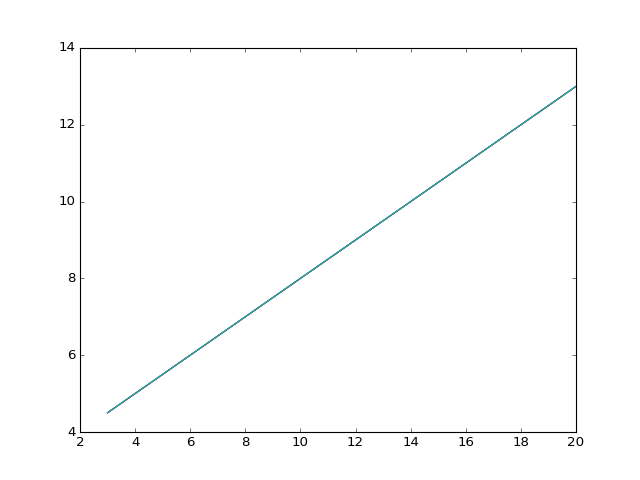

In [21]:
fig = plt.figure()
plt.plot(QA_x1_pred, QA_y1_pred, '-', label='QA1_model')
plt.plot(QA_x2_pred, QA_y2_pred, '-', label='QA2_model')
plt.plot(QA_x3_pred, QA_y3_pred, '-', label='QA3_model')
plt.plot(QA_x4_pred, QA_y4_pred, '-', label='QA4_model')

O modo _widget_ incorpora o recurso de podermos salvar o gráfico diretamente como uma imagem num arquivo. Entretanto, também é possível salvar o mesmo utilizando os recursos da biblioteca. 

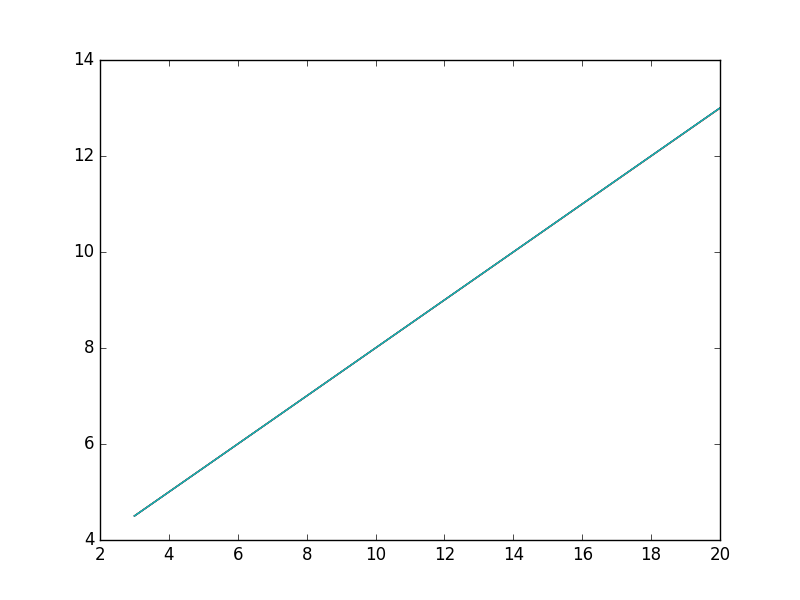

In [22]:
fig.savefig("my_figure.png")
from IPython.display import Image
Image('my_figure.png')

Veja quais formatos de arquivos são suportados.

In [23]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

#### Interface MATLAB-style  ####

__Matplotlib__ foi originalmente criado como uma alternativa __Python__ para usuários do __MATLAB__, e grande parte de sua sintaxe reflete esse fato. As ferramentas estilo __MATLAB__ estão contidas na interface ``pyplot`` (``plt``). Por exemplo, o código a seguir provavelmente parecerá bastante familiar aos usuários do MATLAB.

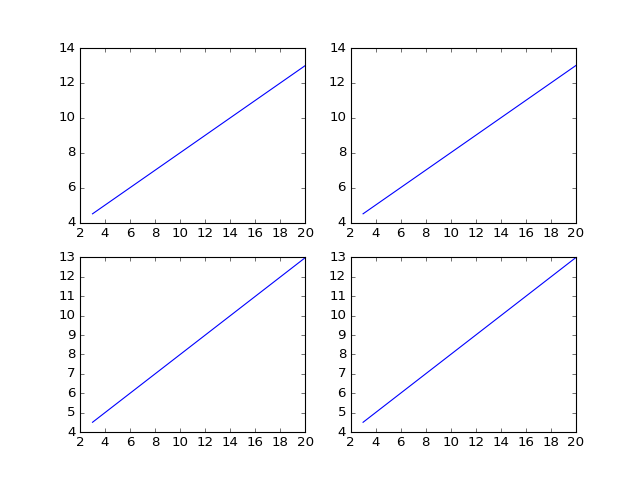

In [24]:
plt.figure()

# crie o primeiro dos dois painéis e defina o eixo atual
plt.subplot(2,2,1) # (rows, columns, panel number)
plt.plot(QA_x1_pred, QA_y1_pred, '-', label='QA1_model');

# crie o segundo painel e defina o eixo atual
plt.subplot(2,2,2)
plt.plot(QA_x2_pred, QA_y2_pred, '-', label='QA2_model');

# crie o terceiro painel e defina o eixo atual
plt.subplot(2,2,3)
plt.plot(QA_x3_pred, QA_y3_pred, '-', label='QA3_model');

# crie o quarto painel e defina o eixo atual
plt.subplot(2,2,4)
plt.plot(QA_x4_pred, QA_y4_pred, '-', label='QA4_model');

É importante observar que essa interface mantém o controle da figura e dos eixos “atuais”, onde todos os comandos `plt` são aplicados. Você pode obter uma referência a eles usando as rotinas 
* `plt.gcf()` (obter valor atual) e
* `plt.gca()` (obter eixos atuais).


Embora essa interface seja rápida e conveniente para gráficos simples, é fácil encontrar problemas. Por exemplo, uma vez criado o segundo painel, como podemos voltar e adicionar algo ao primeiro? Isso é possível na interface estilo __MATLAB__, mas é um pouco desajeitado. Felizmente, existe uma maneira melhor.

#### Interface orientada a objetos

A interface orientada a objetos está disponível para situações mais complicadas e para quando você deseja ter mais controle sobre sua figura.

Em vez de depender de alguma referência de uma figura ou eixos "ativos", na interface orientada a objetos as funções de plotagem são __métodos__ de objetos ``Figura`` e ``Eixos`` explícitos.

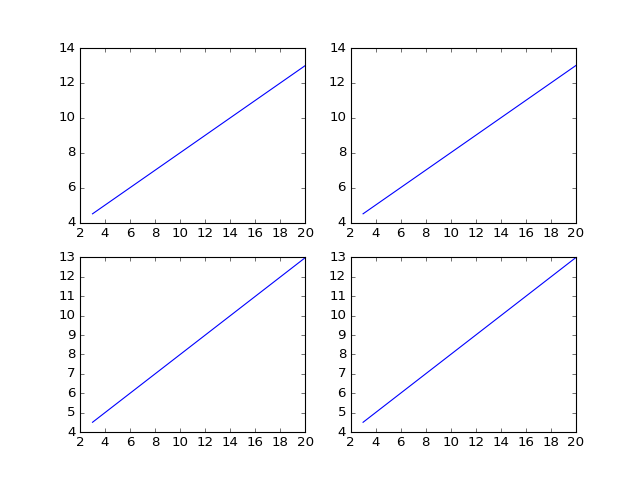

In [25]:
# Primeiro crie uma grade de gráficos
# ax será um array de dois por dois objetos Axes
fig, ax = plt.subplots(2, 2)
# Chama o método plot() no objeto apropriado
ax[0,0].plot(QA_x1_pred, QA_y1_pred, '-', label='QA1_model')
ax[0,1].plot(QA_x2_pred, QA_y2_pred, '-', label='QA2_model')
ax[1,0].plot(QA_x3_pred, QA_y3_pred, '-', label='QA3_model')
ax[1,1].plot(QA_x4_pred, QA_y4_pred, '-', label='QA4_model')
#plt.show()

Para gráficos mais simples, a escolha de qual estilo usar é em grande parte uma questão de preferência, mas a abordagem orientada a objetos pode se tornar uma necessidade à medida que os gráficos se tornam mais complicados.

Ao longo desta aula, alternaremos entre as interfaces estilo MATLAB e orientadas a objetos, dependendo do que for mais conveniente.

Na maioria dos casos, a diferença é tão pequena quanto mudar ``plt.plot()`` para ``ax.plot()``, mas existem algumas dicas que iremos destacar à medida que surgirem nas seções seguintes.

### Gráficos de linhas simples

Talvez o mais simples de todos os gráficos seja a visualização de uma única função $y = f(x)$.

Para todos os gráficos do __Matplotlib__, começamos criando uma figura e um eixo.
Na sua forma mais simples, uma figura e eixos podem ser criados da seguinte forma.

In [ ]:
fig = plt.figure()
ax = plt.axes()

No __Matplotlib__, a ``figure`` (uma instância da classe ``plt.Figure``) pode ser pensada como um único contêiner que contém todos os objetos que representam eixos, gráficos, texto e rótulos.

Os ``axes`` (uma instância da classe ``plt.Axes``) é o que vemos acima: uma caixa delimitadora com marcas de seleção e rótulos, que eventualmente conterá os elementos do gráfico que compõem nossa visualização.

Frequentemente utilizaremos o nome da variável ``fig`` para nos referirmos a uma instância de figura, e ``ax`` para nos referirmos a uma instância de eixos ou grupo de instâncias de eixos.

Depois de criarmos os eixos, podemos usar a função ``ax.plot`` para plotar alguns dados.

In [ ]:
plt.close(fig)
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 2*np.pi, 100)
ax.plot(x, np.sin(x));

Alternativamente, podemos usar a interface __MATLAB__ e deixar a figura e os eixos serem criados para nós em segundo plano.

In [ ]:
plt.close(fig)
plt.figure()
plt.plot(x, np.sin(x));

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Ajustando o gráfico: cores e estilos de linha

O primeiro ajuste que você pode querer fazer em um gráfico é controlar as cores e estilos das linhas.

A função ``plt.plot()`` recebe argumentos adicionais que podem ser usados para especificá-los.

Para ajustar a cor, você pode usar a palavra-chave ``color``, que aceita um argumento de string representando praticamente qualquer cor imaginável.

A cor pode ser especificada de várias maneiras

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Se nenhuma cor for especificada, o __Matplotlib__ percorrerá automaticamente um conjunto de cores padrão para várias linhas.

Da mesma forma, o estilo da linha pode ser ajustado usando a palavra-chave ``linestyle``.

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Se você quiser ser extremamente conciso, esses códigos ``linestyle`` e ``color`` podem ser combinados em um único argumento sem palavra-chave para a função ``plt.plot()``

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### Ajustando o gráfico: limites dos eixos

O __Matplotlib__ faz escolhe de forma automática os limites dos eixos padrão para o seu gráfico. Os limites padrão são, de forma geral, feitos de forma apropriada. Entretanto, às vezes é bom ter um controle mais preciso destes limites.
A maneira mais básica de ajustar os limites dos eixos é usar os métodos ``plt.xlim()`` e ``plt.ylim()``.

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
xmin = x.min() - 1
xmax = x.max() + 1
ymin = -1.1
ymax = 1.1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);

Se por algum motivo você quiser que qualquer um dos eixos seja exibido ao contrário, você pode simplesmente inverter a ordem dos argumentos.

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
xmin = x.min() - 1
xmax = x.max() + 1
ymin = -1.1
ymax = 1.1
plt.xlim(xmax, xmin)
plt.ylim(ymax, ymin);

Outro método muito útil para esta finalidade é ``plt.axis()``.

(Cuidado aqui para não confundir entre ``axes`` com um _e_ e ``axis`` com um _i_)

O método ``plt.axis()`` permite que você defina os limites ``x`` e ``y`` com uma única chamada, passando uma lista que especifica ``[xmin, xmax, ymin, ymax] ``

In [ ]:
plt.close('all')
plt.figure("Nome da figura")
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.axis([xmin, xmax, ymax, ymin]);

O método plt.axis() vai além disso, permitindo que você faça coisas como restringir automaticamente os limites do gráfico atual ...

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.axis('tight');

... ou garantir uma proporção de proporções iguais para que na sua tela, ou seja, que uma unidade em ``x`` seja igual a uma unidade em ``y``.

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.axis('equal');

### Ajustando o gráfico: adicionando rótulos

Títulos e rótulos de eixo são os rótulos mais simples configurar já que existem métodos que podem ser usados para defini-los rapidamente.

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x), label='$\sin(x)$')
plt.plot(x, np.cos(x), label='$\cos(x)$')
plt.axis('tight');
plt.title("Funções Trigonométricas")
plt.xlabel("x")
plt.ylabel("$f(x)$");

A posição, tamanho e estilo desses rótulos podem ser ajustados usando argumentos opcionais para a função. 

Quando múltiplas curvas estão sendo mostradas dentro de um único eixo, pode ser útil criar uma legenda de plotagem que rotule cada uma.
Novamente, o __Matplotlib__ possui uma maneira integrada de criar rapidamente tal legenda.
Isso é feito através do método ``plt.legend()``.
Embora existam várias maneiras válidas de usar este recurso, o mais simples é especificar o rótulo de cada curva usando a palavra-chave ``label`` da função ``plot``.

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x, np.sin(x), label='$\sin(x)$')
plt.plot(x, np.cos(x), label='$\cos(x)$')
plt.axis('equal');
plt.title("Funções Trigonométricas")
plt.xlabel("x")
plt.ylabel("$f(x)$");
plt.legend();

Como você pode ver, a função ``plt.legend()`` rastreia o estilo e a cor da linha e combina-os com o rótulo correto.

Embora a maioria das funções ``plt`` sejam traduzidas diretamente para métodos ``ax`` (como ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), este não é o caso para todos os comandos.
Em particular, as funções para definir limites, rótulos e títulos foram ligeiramente modificadas.
Para fazer a tradução entre funções no estilo __MATLAB__ e métodos orientados a objetos, faça as seguintes alterações:

- ``plt.xlabel()`` → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()`` → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

Na interface orientada a objetos para plotagem, em vez de chamar essas funções individualmente, geralmente é mais conveniente usar o método ``ax.set()`` para definir todas essas propriedades de uma vez.

In [ ]:
plt.close('all')
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), label='$\sin(x)$')
ax.plot(x, np.cos(x), label='$\cos(x)$')
ax.set_aspect('equal')
ax.set(xlabel='x', ylabel='$f(x)$',
       title='Funções Trigonométricas');
ax.legend();

# Gráficos de dispersão simples

Outro tipo de gráfico comumente usado é o gráfico de dispersão simples, um primo próximo do gráfico de linhas.
Em vez de os pontos serem unidos por segmentos de linha, aqui os pontos são representados individualmente com um ponto, círculo ou outra forma.

A função ``plt.plot``, que utilizamos para gerar gráficos de linha, também pode ser utilizada para gerar gráficos de dispersão.  

In [ ]:
plt.close('all')
plt.figure()
plt.plot(x[::4], np.sin(x[::4]), 'o', color = 'black', label='$\sin(x)$')
#plt.plot(x, np.cos(x), label='$\cos(x)$')
plt.axis('tight');
plt.title("Funções Trigonométricas")
plt.xlabel("x")
plt.ylabel("$f(x)$");
plt.legend();

O novo argumento na chamada de função é um caractere que representa o tipo de símbolo usado para a plotagem. Assim como você pode especificar opções como ``'-'``, ``'--'`` para controlar o estilo da linha, o estilo do marcador tem seu próprio conjunto de códigos de string curtos.

In [ ]:
plt.close('all')
plt.figure()
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

### Gráficos de dispersão com ``plt.scatter``

Um segundo método mais poderoso de criar gráficos de dispersão é a função ``plt.scatter``, que pode ser usada de forma muito semelhante à função ``plt.plot``.

In [ ]:
plt.close('all')
plt.figure()
plt.scatter(x[::4], np.sin(x[::4]), marker='o', label='$\sin(x)$')
#plt.plot(x[::4], np.sin(x[::4]), 'o', color = 'black', label='$\sin(x)$')
#plt.plot(x, np.cos(x), label='$\cos(x)$')
plt.axis('tight');
plt.title("Funções Trigonométricas")
plt.xlabel("x")
plt.ylabel("$f(x)$");
plt.legend(numpoints=1);

A principal diferença entre ``plt.scatter`` e ``plt.plot`` é que ele pode ser usado para criar gráficos de dispersão onde as propriedades de cada ponto individual (tamanho, cor da face, cor da borda, etc.) podem ser controlados individualmente ou mapeados para dados.

Vamos mostrar isso criando um gráfico de dispersão aleatório com pontos de várias cores e tamanhos.
Para ver melhor os resultados sobrepostos, também usaremos a palavra-chave ``alpha`` para ajustar o nível de transparência

In [ ]:
plt.close('all')
plt.figure()
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Repare que o argumento color é automaticamente mapeado para uma escala de cores (mostrada aqui pelo comando ``colorbar()``), e que o argumento size é dado em pixels.
Desta forma, a cor e o tamanho dos pontos podem ser utilizados para transmitir informações na visualização, a fim de visualizar dados multidimensionais.

Por exemplo, podemos usar os dados Iris do Scikit-Learn, onde cada amostra é um dos três tipos de flores cujo tamanho de pétalas e sépalas foi cuidadosamente medido.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.close('all')
plt.figure()
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Podemos ver que este gráfico de dispersão nos deu a capacidade de explorar simultaneamente quatro dimensões diferentes dos dados: a localização (x, y) de cada ponto corresponde ao comprimento e largura da sépala, o tamanho do ponto está relacionado à largura da pétala e a cor está relacionada à espécie específica de flor. Gráficos de dispersão multicoloridos e com vários recursos como este podem ser úteis tanto para exploração quanto para apresentação de dados.

Além dos diferentes recursos disponíveis em ``plt.plot`` e ``plt.scatter``, por que você escolheria usar um em vez do outro? Embora isso não importe tanto para pequenas quantidades de dados, já que os conjuntos de dados ficam maiores que alguns milhares de pontos, ``plt.plot`` pode ser visivelmente mais eficiente que ``plt.scatter``.
A razão é que ``plt.scatter`` tem a capacidade de renderizar um tamanho e/ou cor diferente para cada ponto, então o renderizador deve fazer o trabalho extra de construir cada ponto individualmente.
Em ``plt.plot``, por outro lado, os pontos são sempre essencialmente clones uns dos outros, portanto o trabalho de determinar a aparência dos pontos é feito apenas uma vez para todo o conjunto de dados.
Para grandes conjuntos de dados, a diferença entre os dois pode levar a um desempenho muito diferente e, por esta razão, ``plt.plot`` deve ser preferido a ``plt.scatter`` para grandes conjuntos de dados.

### Voltando ao Quarteto de Anscombe

Vamos então refazer concluir a análise do quarteto de Anscombe criando uma visualização de cada série junto com ajuste que fizemos da cada um, utilizando a regressão linear. Misturamos aqui um gráfico de linha com um gráfico de dispersão em cada subplot. 

Primeiramente utilizamos o estilo __MATLAB__.

In [ ]:
plt.close('all')
plt.figure("Figura 1: Quarteto de Anscombe")

# crie o primeiro dos dois painéis e defina o eixo atual
plt.subplot(2,2,1) # (rows, columns, panel number)
plt.plot(QA_x1_pred, QA_y1_pred, '-', label='QA1_model');
plt.scatter(QA_x1, QA_y1, marker='o', label='QA1', color = 'red')
#plt.xlabel('x')
plt.ylabel('y')
plt.title('QA1')
#plt.legend()

# crie o segundo painel e defina o eixo atual
plt.subplot(2,2,2)
plt.plot(QA_x2_pred, QA_y2_pred, '-', label='QA2_model');
plt.scatter(QA_x2, QA_y2, marker='o', label='QA1', color = 'red')
#plt.xlabel('x')
plt.ylabel('y')
plt.title('QA2')

# crie o terceiro painel e defina o eixo atual
plt.subplot(2,2,3)
plt.plot(QA_x3_pred, QA_y3_pred, '-', label='QA3_model');
plt.scatter(QA_x3, QA_y3, marker='o', label='QA1', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('QA3')

# crie o quarto painel e defina o eixo atual
plt.subplot(2,2,4)
plt.plot(QA_x4_pred, QA_y4_pred, '-', label='QA4_model');
plt.scatter(QA_x4, QA_y4, marker='o', label='QA1', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('QA4')

Agora com a interface orientada a objetos

In [ ]:
# Primeiro crie uma grade de gráficos
# ax será um array de dois por dois objetos Axes
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
# Chama o método plot() no objeto apropriado
ax[0,0].plot(QA_x1_pred, QA_y1_pred, '-', label='QA1_model')
ax[0,0].scatter(QA_x1, QA_y1, marker='o', label='QA1', color = 'red')
ax[0,0].set(ylabel='$f(x)$', title='QA1');
ax[0,1].plot(QA_x2_pred, QA_y2_pred, '-', label='QA2_model')
ax[0,1].scatter(QA_x2, QA_y2, marker='o', label='QA1', color = 'red')
ax[0,1].set(title='QA2');
ax[1,0].plot(QA_x3_pred, QA_y3_pred, '-', label='QA3_model')
ax[1,0].scatter(QA_x3, QA_y3, marker='o', label='QA1', color = 'red')
ax[1,0].set(xlabel='x', ylabel='$f(x)$', title='QA3');
ax[1,1].plot(QA_x4_pred, QA_y4_pred, '-', label='QA4_model')
ax[1,1].scatter(QA_x4, QA_y4, marker='o', label='QA1', color = 'red')
ax[1,1].set(xlabel='x', title='QA4');
#plt.show()